In [2]:
import numpy as np
data=np.loadtxt('mnist_test.csv',delimiter=',')
x=data[:,1:]
y=data[:,0:1].astype(int)

# 对label进行独热编码后的数据 one hot encoding
Y=np.eye(10)[y.T[0]]

# 重要操作

In [20]:
#!pip install scikit-learn

In [3]:
## 把数据集拆分成训练集和测试集，80%的数据训练，20%的数据测试
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,Y,test_size=0.2,random_state=23)
len(x_train)

8000

# 第一个模型的训练

In [11]:
## 导入TensorFlow的包
from tensorflow.keras.models import Sequential#顺序模型：从左边输入，从右边输出
from tensorflow.keras.layers import Dense,Activation#Dense：线性输入输出；Activation：激活函数
import numpy as np

## 创建模型
model=Sequential()#创建一个顺序模型
model.add(Dense(10,input_shape=(784,)))#输入784个数据，输出10个数据
model.add(Activation('softmax'))#多分类要使用softmax的激活函数
model.summary()

## 设置模型的训练参数
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#多分类
## 训练模型
result=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))#在训练过程中就查看验证集数据的准确度

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
63/63 [==============================] - 0s 3ms/step - loss: 45.0460 - accuracy: 0.5443 - val_loss: 14.0385 - val_accuracy: 0.7850
Epoch 2/30
63/63 [==============================] - 0s 2ms/step - loss: 10.1901 - accuracy: 0.8151 - val_loss: 9.5844 - val_accuracy: 0.8230
Epoch 3/30
63/63 [==============================] - 0s 2ms/step - loss: 7.2459 - accuracy: 0.8525 - val_loss: 7.8647 - val_accuracy: 0.8475
Epoch 4/30
63/63 [==============================] - 0s 2ms/step - loss: 5.7108 - accuracy: 

In [7]:
y_predict=model.predict(x_test)#预测值
y_test#真实值
count=0
for i in range(len(y_test)):
    predict=np.argmax(y_predict[i])
    real=np.argmax(y_test[i])
    if(predict==real):
        count+=1
        
count/len(y_test)

0.8675

In [12]:
result.history

{'accuracy': [0.5442500114440918,
  0.8151249885559082,
  0.8525000214576721,
  0.8733749985694885,
  0.8840000033378601,
  0.887624979019165,
  0.8964999914169312,
  0.9023749828338623,
  0.9049999713897705,
  0.9129999876022339,
  0.9183750152587891,
  0.9146249890327454,
  0.9227499961853027,
  0.9226250052452087,
  0.925125002861023,
  0.9256250262260437,
  0.9291250109672546,
  0.9353749752044678,
  0.9416249990463257,
  0.9401249885559082,
  0.9350000023841858,
  0.9353749752044678,
  0.9446250200271606,
  0.9390000104904175,
  0.9430000185966492,
  0.9507499933242798,
  0.9551249742507935,
  0.9524999856948853,
  0.9520000219345093,
  0.953125],
 'loss': [45.04598617553711,
  10.190058708190918,
  7.245877742767334,
  5.710812091827393,
  4.739814281463623,
  4.23527717590332,
  3.6236488819122314,
  3.248626470565796,
  3.09267520904541,
  2.7518184185028076,
  2.312551975250244,
  2.329375982284546,
  1.9607136249542236,
  1.9527380466461182,
  1.7598789930343628,
  1.78459858

<IPython.core.display.Javascript object>


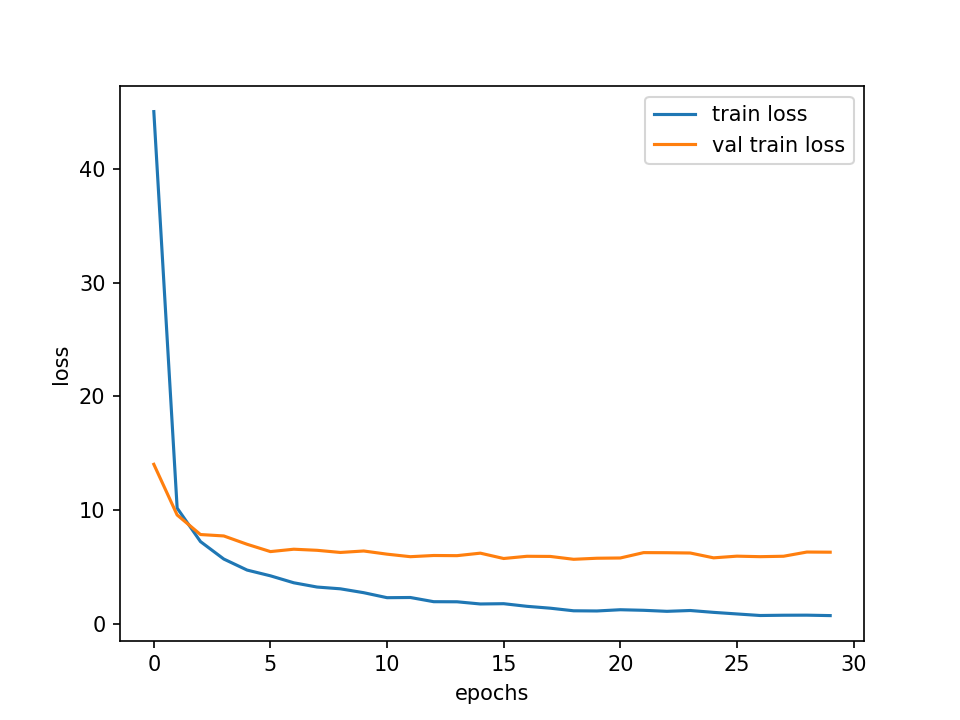

In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook
loss_value=result.history['loss']
val_loss_value=result.history['val_loss']

linel=plt.plot(np.arange(0,len(loss_value)),loss_value,label="train loss")
linel=plt.plot(np.arange(len(val_loss_value)),val_loss_value,label="val train loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


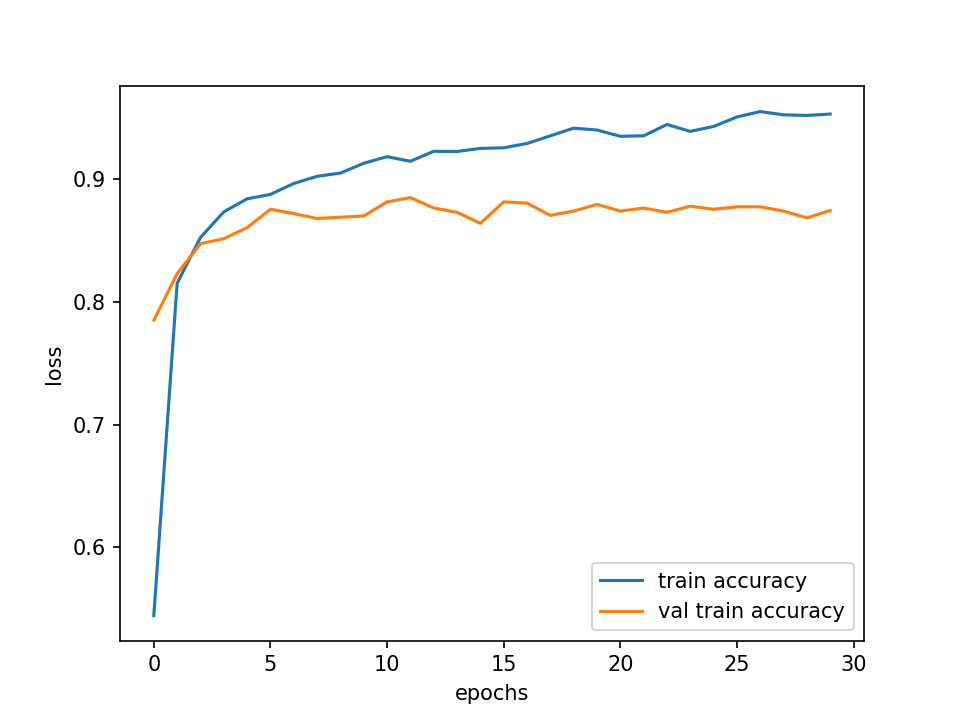

In [16]:
# 可视化图表，把accuracy精确度的变换展示出来
import matplotlib.pyplot as plt
%matplotlib notebook
accuracy_value=result.history['accuracy']
val_accuracy_value=result.history['val_accuracy']

linel=plt.plot(np.arange(0,len(accuracy_value)),accuracy_value,label="train accuracy")
linel=plt.plot(np.arange(len(val_accuracy_value)),val_accuracy_value,label="val train accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# 更复杂

In [17]:
## 创建模型
model=Sequential()#创建一个顺序模型
## 指定模型的输入和输出
model.add(Dense(30,input_shape=(784,)))#输入784个数据，输出30个数据
## 制定模型的激活函数
model.add(Activation('relu'))#多分类要使用softmax的激活函数
model.add(Dense(10))#输入30个数据，输出10个数据
model.add(Activation('softmax'))#多分类最后一行要使用softmax的激活函数

## 打印模型的概要信息
model.summary()

## 设置模型的训练参数
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#多分类
## 训练模型
result=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))#在训练过程中就查看验证集数据的准确度

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 30)                23550     
_________________________________________________________________
activation_6 (Activation)    (None, 30)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                310       
_________________________________________________________________
activation_7 (Activation)    (None, 10)                0         
Total params: 23,860
Trainable params: 23,860
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 26.3130 - accuracy: 0.5131 - val_loss: 4.3272 - val_accuracy: 0.5720
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 2.3122 - accuracy: 0.5596 - val_l

63/63 [==============================] - 0s 2ms/step - loss: 0.1591 - accuracy: 0.9461 - val_loss: 1.1715 - val_accuracy: 0.8925
Epoch 53/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1754 - accuracy: 0.9416 - val_loss: 1.1426 - val_accuracy: 0.8940
Epoch 54/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9421 - val_loss: 1.1429 - val_accuracy: 0.9010
Epoch 55/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1596 - accuracy: 0.9484 - val_loss: 1.1462 - val_accuracy: 0.8935
Epoch 56/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1549 - accuracy: 0.9451 - val_loss: 1.1243 - val_accuracy: 0.9025
Epoch 57/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1382 - accuracy: 0.9486 - val_loss: 1.1728 - val_accuracy: 0.9005
Epoch 58/100
63/63 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9503 - val_loss: 1.2545 - val_accuracy: 0.8945
Epoch 59/100
63/63 

<IPython.core.display.Javascript object>


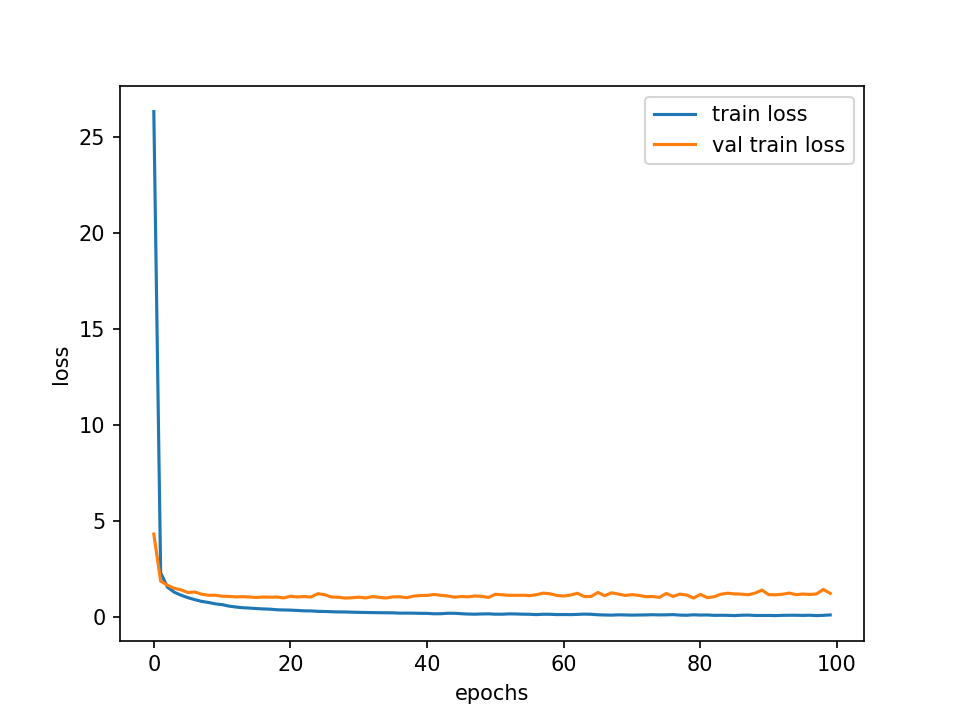

In [18]:
import matplotlib.pyplot as plt
%matplotlib notebook
loss_value=result.history['loss']
val_loss_value=result.history['val_loss']

linel=plt.plot(np.arange(0,len(loss_value)),loss_value,label="train loss")
linel=plt.plot(np.arange(len(val_loss_value)),val_loss_value,label="val train loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


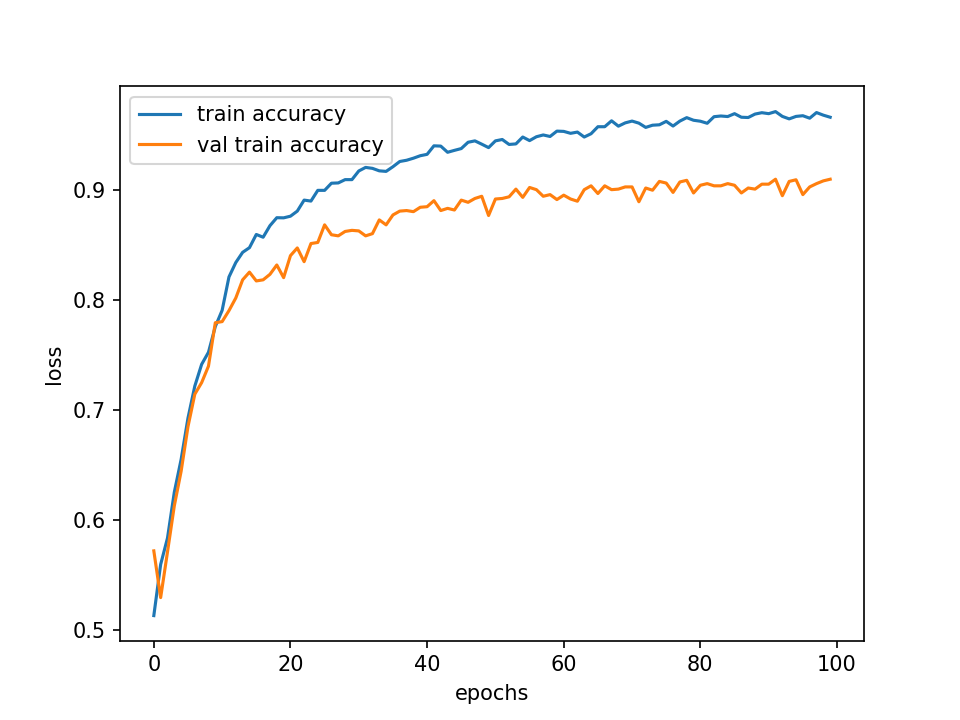

In [19]:
# 可视化图表，把accuracy精确度的变换展示出来
import matplotlib.pyplot as plt
%matplotlib notebook
accuracy_value=result.history['accuracy']
val_accuracy_value=result.history['val_accuracy']

linel=plt.plot(np.arange(0,len(accuracy_value)),accuracy_value,label="train accuracy")
linel=plt.plot(np.arange(len(val_accuracy_value)),val_accuracy_value,label="val train accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [21]:
# 超级复杂的神经网络
## 784-2500-2000-1500-1000-500-10
model=Sequential()
model.add(Dense(2500,input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(2000))
model.add(Activation('relu'))
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dense(500))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

## 设置模型的训练参数
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#多分类
## 训练模型
result=model.fit(x_train,y_train,epochs=100,batch_size=128,validation_data=(x_test,y_test))#在训练过程中就查看验证集数据的准确度

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 2500)              1962500   
_________________________________________________________________
activation_14 (Activation)   (None, 2500)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 2000)              5002000   
_________________________________________________________________
activation_15 (Activation)   (None, 2000)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 1500)              3001500   
_________________________________________________________________
activation_16 (Activation)   (None, 1500)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1000)             

63/63 [==============================] - 9s 139ms/step - loss: 3.0394e-06 - accuracy: 1.0000 - val_loss: 0.2541 - val_accuracy: 0.9640
Epoch 45/100
63/63 [==============================] - 9s 137ms/step - loss: 2.3064e-06 - accuracy: 1.0000 - val_loss: 0.2603 - val_accuracy: 0.9640
Epoch 46/100
63/63 [==============================] - 9s 140ms/step - loss: 1.8014e-06 - accuracy: 1.0000 - val_loss: 0.2653 - val_accuracy: 0.9645
Epoch 47/100
63/63 [==============================] - 8s 135ms/step - loss: 1.4296e-06 - accuracy: 1.0000 - val_loss: 0.2702 - val_accuracy: 0.9645
Epoch 48/100
63/63 [==============================] - 9s 138ms/step - loss: 1.1803e-06 - accuracy: 1.0000 - val_loss: 0.2745 - val_accuracy: 0.9645
Epoch 49/100
63/63 [==============================] - 8s 130ms/step - loss: 9.8492e-07 - accuracy: 1.0000 - val_loss: 0.2789 - val_accuracy: 0.9645
Epoch 50/100
63/63 [==============================] - 8s 132ms/step - loss: 8.2731e-07 - accuracy: 1.0000 - val_loss: 0.2828 

63/63 [==============================] - 9s 136ms/step - loss: 1.5214e-08 - accuracy: 1.0000 - val_loss: 0.3883 - val_accuracy: 0.9655
Epoch 100/100
63/63 [==============================] - 9s 137ms/step - loss: 1.4484e-08 - accuracy: 1.0000 - val_loss: 0.3894 - val_accuracy: 0.9655


<IPython.core.display.Javascript object>


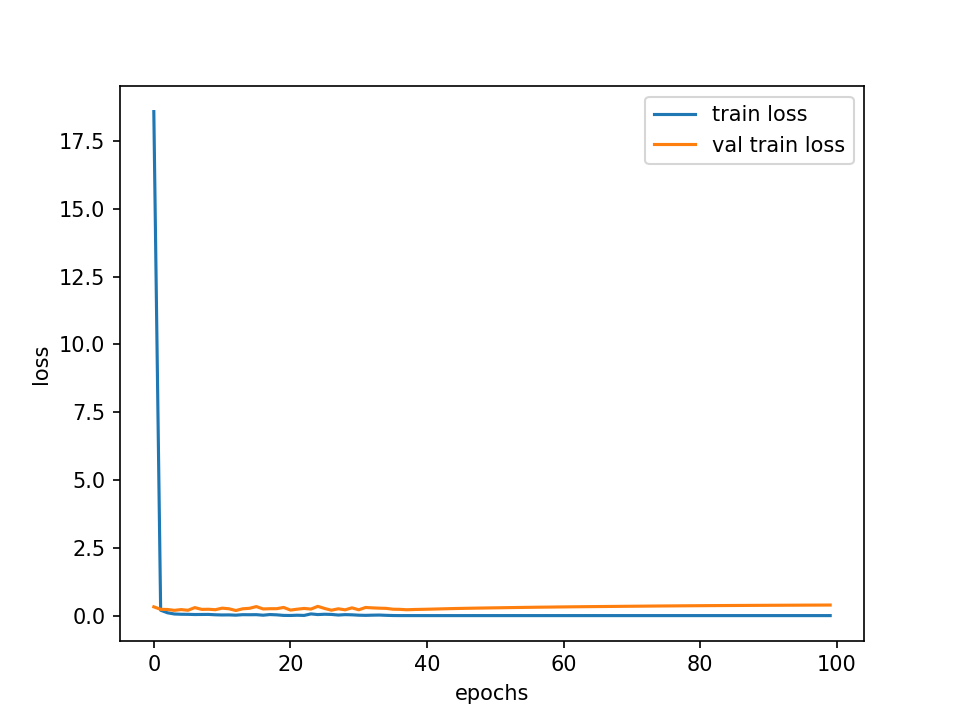

In [22]:
import matplotlib.pyplot as plt
%matplotlib notebook
loss_value=result.history['loss']
val_loss_value=result.history['val_loss']

linel=plt.plot(np.arange(0,len(loss_value)),loss_value,label="train loss")
linel=plt.plot(np.arange(len(val_loss_value)),val_loss_value,label="val train loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


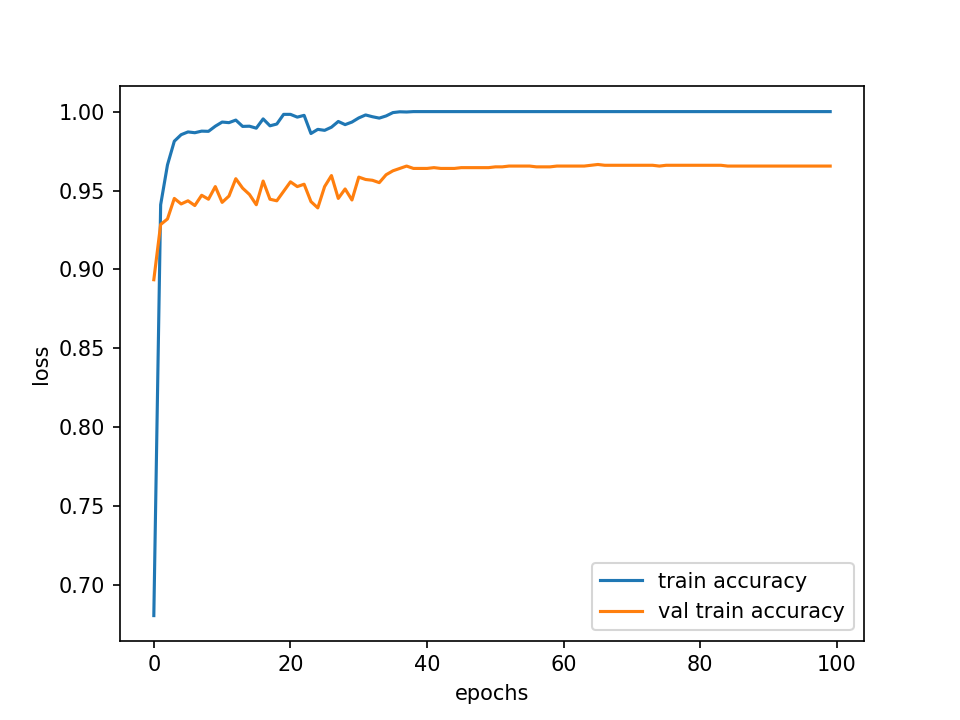

In [23]:
# 可视化图表，把accuracy精确度的变换展示出来
import matplotlib.pyplot as plt
%matplotlib notebook
accuracy_value=result.history['accuracy']
val_accuracy_value=result.history['val_accuracy']

linel=plt.plot(np.arange(0,len(accuracy_value)),accuracy_value,label="train accuracy")
linel=plt.plot(np.arange(len(val_accuracy_value)),val_accuracy_value,label="val train accuracy")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

In [24]:
model.save('mnist_most_flux.h5')